# Análisis de los datos obtenidos 

Uso de ipython para el análsis y muestra de los datos obtenidos durante la producción.Se implementa un regulador experto. Los datos analizados son del día 13 de Agosto del 2015

Los datos del experimento:
* Hora de inicio: 12:06
* Hora final : 12:26
* Filamento extruido: 314Ccm
* $T: 150ºC$
* $V_{min} tractora: 1.5 mm/s$
* $V_{max} tractora: 5.3 mm/s$
* Los incrementos de velocidades en las reglas del sistema experto son distintas:
    * En los caso 3 y 5 se mantiene un incremento de +2.
    * En los casos 4 y 6 se reduce el incremento a -1.
    
Este experimento dura 20min por que a simple vista se ve que no aporta ninguna mejora, de hecho, añade más inestabilidad al sitema.
Se opta por añadir más reglas al sistema, e intentar hacer que la velocidad de tracción no llegue a los límites.

In [33]:
#Importamos las librerías utilizadas
import numpy as np
import pandas as pd
import seaborn as sns

In [34]:
#Mostramos las versiones usadas de cada librerías
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [35]:
#Abrimos el fichero csv con los datos de la muestra
datos = pd.read_csv('ensayo5.CSV')

In [36]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [37]:
#Almacenamos en una lista las columnas del fichero con las que vamos a trabajar
columns = ['Diametro X','Diametro Y', 'RPM TRAC']

In [38]:
#Mostramos un resumen de los datos obtenidoss
datos[columns].describe()
#datos.describe().loc['mean',['Diametro X [mm]', 'Diametro Y [mm]']]

,Diametro X,Diametro Y,RPM TRAC
count,750.000000,750.000000,750.000000
mean,1.436204,1.381896,2.500000
std,0.363320,0.373249,1.387489
min,0.014000,0.000342,1.700000
25%,1.172458,1.138152,1.700000
50%,1.344506,1.287561,1.700000
75%,1.723012,1.617986,3.300000
max,2.319446,2.459850,5.300000


Representamos ambos diámetro y la velocidad de la tractora en la misma gráfica

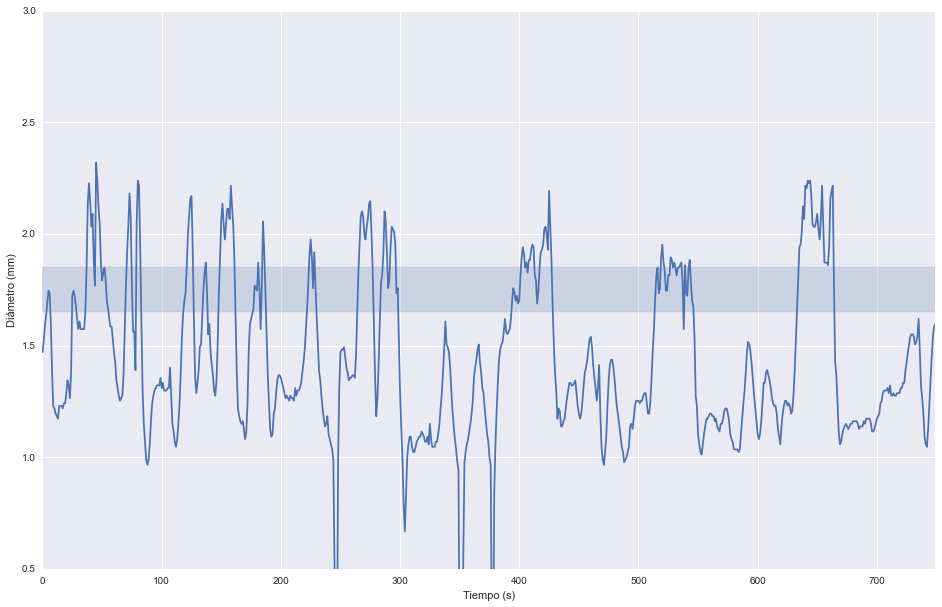

In [39]:
graf = datos.ix[:, "Diametro X"].plot(figsize=(16,10),ylim=(0.5,3))
graf.axhspan(1.65,1.85, alpha=0.2)
graf.set_xlabel('Tiempo (s)')
graf.set_ylabel('Diámetro (mm)')
#datos['RPM TRAC'].plot(secondary_y='RPM TRAC')

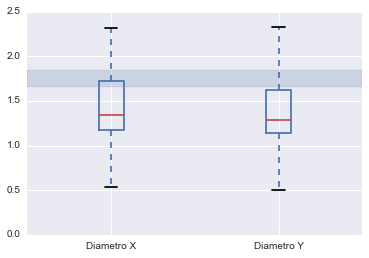

In [40]:
box = datos.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')
box.axhspan(1.65,1.85, alpha=0.2)

Comparativa de Diametro X frente a Diametro Y para ver el ratio del filamento

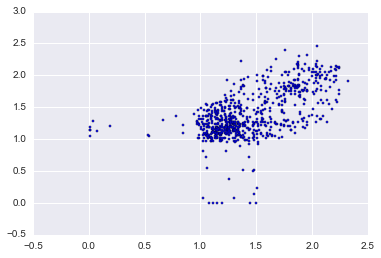

In [41]:
plt.scatter(x=datos['Diametro X'], y=datos['Diametro Y'], marker='.')

#Filtrado de datos
Las muestras tomadas $d_x >= 0.9$ or $d_y >= 0.9$ las asumimos como error del sensor, por ello las filtramos de las muestras tomadas.

In [42]:
datos_filtrados = datos[(datos['Diametro X'] >= 0.9) & (datos['Diametro Y'] >= 0.9)]

In [43]:
#datos_filtrados.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

##Representación de X/Y

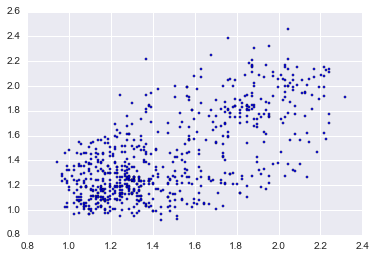

In [44]:
plt.scatter(x=datos_filtrados['Diametro X'], y=datos_filtrados['Diametro Y'], marker='.')

#Analizamos datos del ratio

In [45]:
ratio = datos_filtrados['Diametro X']/datos_filtrados['Diametro Y']
ratio.describe()

count    717.000000
mean       1.052009
std        0.204253
min        0.616384
25%        0.916724
50%        1.030142
75%        1.140996
max        1.689048
dtype: float64

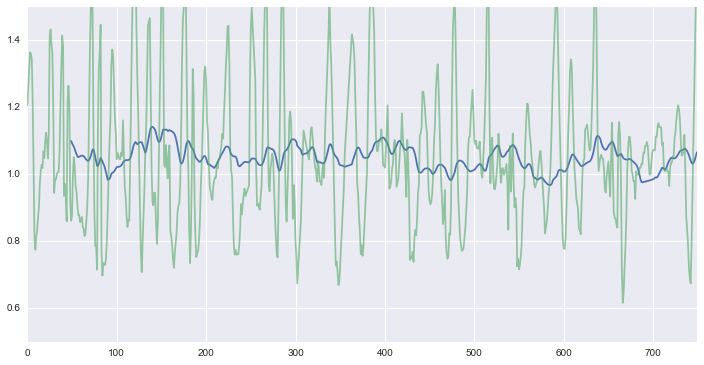

In [46]:
rolling_mean = pd.rolling_mean(ratio, 50)
rolling_std = pd.rolling_std(ratio, 50)
rolling_mean.plot(figsize=(12,6))
# plt.fill_between(ratio, y1=rolling_mean+rolling_std, y2=rolling_mean-rolling_std, alpha=0.5)
ratio.plot(figsize=(12,6), alpha=0.6, ylim=(0.5,1.5))

#Límites de calidad

Calculamos el número de veces que traspasamos unos límites de calidad. 
$Th^+ = 1.85$ and $Th^- = 1.65$ 

In [47]:
Th_u = 1.85
Th_d = 1.65

In [48]:
data_violations = datos[(datos['Diametro X'] > Th_u) | (datos['Diametro X'] < Th_d) |
                       (datos['Diametro Y'] > Th_u) | (datos['Diametro Y'] < Th_d)]

In [49]:
data_violations.describe()

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y,MARCHA,PARO,RPM EXTR,RPM TRAC
count,719.000000,719.000000,719.000000,719.000000,719,719,719,719.000000
mean,66.321280,151.304172,1.421605,1.364943,1,1,0,2.442142
std,0.200433,0.891735,0.363879,0.371820,0,0,0,1.360563
min,65.900000,149.500000,0.014000,0.000342,True,True,0,1.700000
25%,66.100000,150.600000,1.172458,1.138152,1,1,0,1.700000
50%,66.400000,151.200000,1.321566,1.264575,1,1,0,1.700000
75%,66.500000,152.000000,1.631253,1.563394,1,1,0,1.700000
max,66.600000,153.200000,2.319446,2.459850,True,True,0,5.300000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0634CBD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x09780310>], dtype=object)

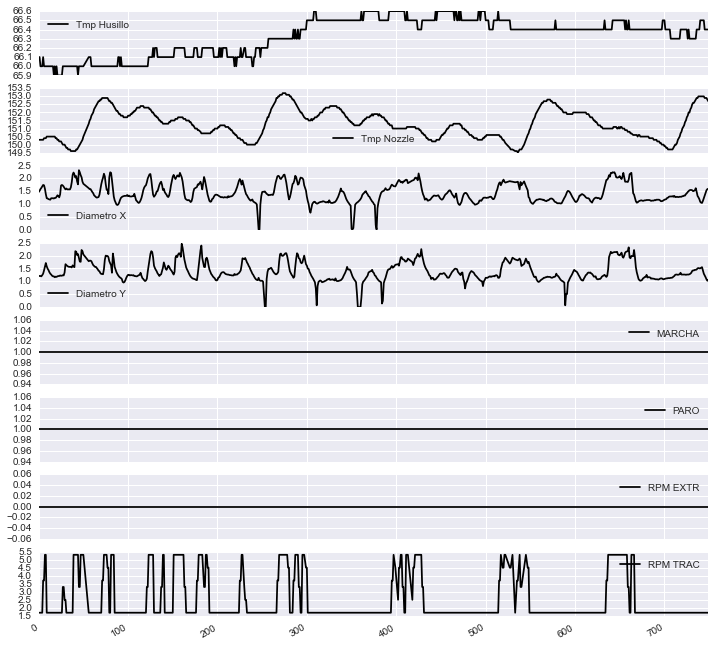

In [50]:
data_violations.plot(subplots=True, figsize=(12,12))